In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [3]:
kdf = pd.read_csv('tracks.csv')

In [5]:
kdf

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [7]:
# List of file paths
file_paths = [
    'mpd.slice.0-999.json',
    'mpd.slice.99000-99999.json',
    'mpd.slice.995000-995999.json',
    'mpd.slice.996000-996999.json',
    'mpd.slice.997000-997999.json',
    'mpd.slice.998000-998999.json',
    'mpd.slice.999000-999999.json'
]

# Initialize an empty list to store all data
all_data = []

# Iterate through each file
for file_path in file_paths:
    with open(file_path, 'r') as file:
        data = json.load(file)
        # Iterate through each playlist
        for playlist in data['playlists']:
            playlist_name = playlist['name']
            playlist_desc = playlist.get('description', '')  # Use .get() to handle missing descriptions
            # Iterate through each track in the playlist
            for track in playlist['tracks']:
                # Remove the "spotify:track:" prefix from the track_uri
                track_id = track['track_uri'].replace("spotify:track:", "")
                # Append the track data to the all_data list
                all_data.append({
                    'playlist_name': playlist_name,
                    'playlist_desc': playlist_desc,
                    'position_in_playlist': track['pos'],
                    'track_name': track['track_name'],
                    'id': track_id,  # Use the cleaned track ID
                    'artist_name': track['artist_name'],
                    'duration_ms': track['duration_ms'],
                    'album_name': track['album_name']
                })

# Convert the list of dictionaries into a DataFrame
xdf = pd.DataFrame(all_data)

# Display the DataFrame
print(xdf.head())

  playlist_name playlist_desc  position_in_playlist  \
0    Throwbacks                                   0   
1    Throwbacks                                   1   
2    Throwbacks                                   2   
3    Throwbacks                                   3   
4    Throwbacks                                   4   

                                   track_name                      id  \
0  Lose Control (feat. Ciara & Fat Man Scoop)  0UaMYEvWZi0ZqiDOoHU3YI   
1                                       Toxic  6I9VzXrHxO9rA9A5euc8Ak   
2                               Crazy In Love  0WqIKmW4BTrj3eJFmnCKMv   
3                              Rock Your Body  1AWQoqb9bSvzTjaLralEkT   
4                                It Wasn't Me  1lzr43nnXAijIGYnCT8M8H   

         artist_name  duration_ms  \
0      Missy Elliott       226863   
1     Britney Spears       198800   
2            Beyoncé       235933   
3  Justin Timberlake       267266   
4             Shaggy       227600   

       

In [8]:
kdf.dropna

<bound method DataFrame.dropna of                             id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586667  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586668  0NuWgxEp51CutD2pJoF4OM                                blind   
586669  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586670  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586671  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6       126903    

In [9]:
xdf.dropna

<bound method DataFrame.dropna of        playlist_name playlist_desc  position_in_playlist  \
0         Throwbacks                                   0   
1         Throwbacks                                   1   
2         Throwbacks                                   2   
3         Throwbacks                                   3   
4         Throwbacks                                   4   
...              ...           ...                   ...   
468967         BANDA                                 105   
468968         BANDA                                 106   
468969         BANDA                                 107   
468970         BANDA                                 108   
468971         BANDA                                 109   

                                          track_name                      id  \
0         Lose Control (feat. Ciara & Fat Man Scoop)  0UaMYEvWZi0ZqiDOoHU3YI   
1                                              Toxic  6I9VzXrHxO9rA9A5euc8Ak   
2    

In [75]:
dmz = pd.merge(xdf, kdf, on = 'id', how = 'inner')

In [77]:
dmz.dropna()

,playlist_name,playlist_desc,position_in_playlist,track_name,id,artist_name,duration_ms_x,album_name,name,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Throwbacks,,0,Lose Control (feat. Ciara & Fat Man Scoop),0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,226863,The Cookbook,Lose Control (feat. Ciara & Fat Man Scoop),68,...,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,4
1,Throwbacks,,1,Toxic,6I9VzXrHxO9rA9A5euc8Ak,Britney Spears,198800,In The Zone,Toxic,83,...,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,4
2,Throwbacks,,2,Crazy In Love,0WqIKmW4BTrj3eJFmnCKMv,Beyoncé,235933,Dangerously In Love (Alben für die Ewigkeit),Crazy In Love (feat. Jay-Z),25,...,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,4
3,Throwbacks,,3,Rock Your Body,1AWQoqb9bSvzTjaLralEkT,Justin Timberlake,267266,Justified,Rock Your Body,78,...,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,4
4,Throwbacks,,6,My Boo,68vgtRHr7iZHpzGpon6Jlo,Usher,223440,Confessions,My Boo,80,...,5,-8.238,1,0.1180,0.25700,0.000000,0.0465,0.676,86.412,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193783,BANDA,,96,La Venia Bendita,4HAtRUbOtuIkvTSUhDr8sV,Marco Antonio Solís,191640,Marco Antonio Solis,La Venia Bendita,70,...,0,-7.926,1,0.0317,0.13200,0.000000,0.3690,0.491,152.189,3
193784,BANDA,,97,Mi Eterno Amor Secreto,6fR2T8yJcoOygQddq4JbYB,Marco Antonio Solís,223666,Trozos De Mi Alma,Mi Eterno Amor Secreto,64,...,0,-7.230,1,0.0294,0.08260,0.000021,0.1650,0.372,142.928,3
193785,BANDA,,103,La Historia De Mis Manos,1lAfPGUKAQ0tW1TZeRBLkp,Banda Carnaval,232333,La Historia De Mis Manos,La Historia De Mis Manos,56,...,2,-3.184,1,0.0401,0.46400,0.000025,0.0966,0.813,114.998,4
193786,BANDA,,104,El Que Se Enamora Pierde,24Yw6Hoi0sPaJKb16uQZGI,Banda Carnaval,140453,La Historia De Mis Manos,El Que Se Enamora Pierde,50,...,8,-6.072,1,0.0667,0.82200,0.000001,0.0453,0.968,170.256,4


In [79]:
dmz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193788 entries, 0 to 193787
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   playlist_name         193788 non-null  object 
 1   playlist_desc         193788 non-null  object 
 2   position_in_playlist  193788 non-null  int64  
 3   track_name            193788 non-null  object 
 4   id                    193788 non-null  object 
 5   artist_name           193788 non-null  object 
 6   duration_ms_x         193788 non-null  int64  
 7   album_name            193788 non-null  object 
 8   name                  193788 non-null  object 
 9   popularity            193788 non-null  int64  
 10  duration_ms_y         193788 non-null  int64  
 11  explicit              193788 non-null  int64  
 12  artists               193788 non-null  object 
 13  id_artists            193788 non-null  object 
 14  release_date          193788 non-null  object 
 15  

In [81]:
dmzX = dmz.dropna(how = 'all')

In [83]:
dmzX['synthness'] = (1 - dmzX['acousticness']) * dmzX['instrumentalness'] * dmzX['energy']

In [85]:
features =['duration_ms_x', 'popularity', 'valence', 'tempo', 'synthness']

In [87]:
X= dmzX[features].copy()

In [89]:
scaler=StandardScaler()

In [91]:
X_scaled=scaler.fit_transform(X)
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0,X], X[:, 1], c=labels, cmap='virdis', edgecolors='K', alpha=0.7)
    plt.title(title)
    plt.xLabel(features[0])
    plt.yLabel(features[1])
    plt.show()
    

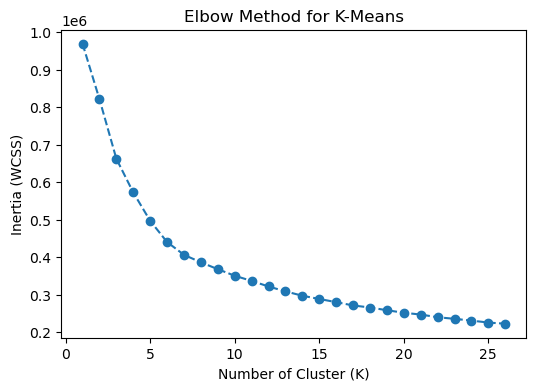

In [93]:
k_values = range(1,27)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Cluster (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for K-Means')
plt.show()